A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

Maybe switch to: https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02

In [1]:
#%matplotlib ipympl
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jhu_helpers import *

In [3]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [4]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [5]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,Brazil,Belgium,Canada,Netherlands,Switzerland,India,Portugal,Ecuador,Peru
Date,,,,,,,,,,,,,,,,,,,
2020-04-20,784326,200210,181228,155393,147065,125856,90980,83505,83817,47121,40743,39983,37657,33588,27944,18539,20863,10128,16325
2020-04-21,811865,204178,183957,158168,148291,130172,95591,84802,83853,52763,43079,40956,39401,34317,28063,20080,21379,10398,17837
2020-04-22,840351,208389,187327,155980,150648,134638,98674,85996,83868,57999,45757,41889,41648,35032,28268,21370,21982,10850,19250
2020-04-23,869170,213024,189973,158303,153129,139246,101790,87026,83884,62773,50036,42797,43285,35921,28496,23077,22353,11183,20914
2020-04-24,905358,219764,192994,159952,154999,144640,104912,88194,83899,68622,54043,44293,44054,36729,28677,24530,22797,22719,21648


In [6]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    #'Singapore',
    'Korea, South',
    'US',
    'France',
    'Germany',
]

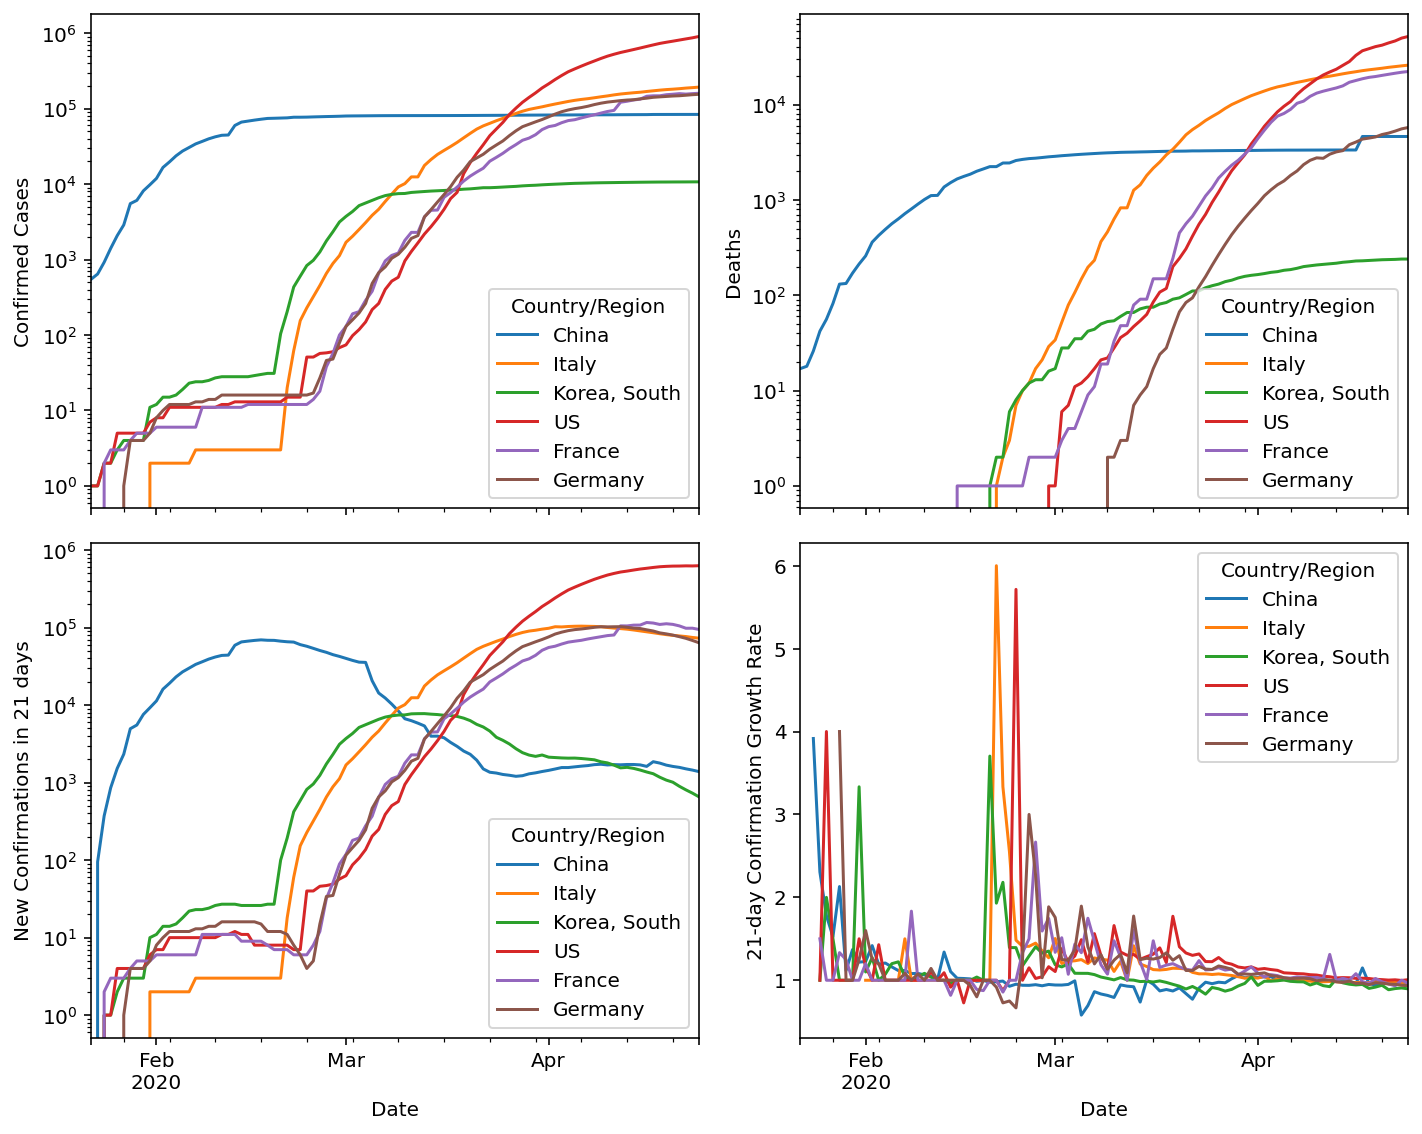

In [7]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed Cases')

jhu.deaths[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Deaths')

jhu.new_infected_21d[plot_countries].plot(ax=ax1[1,0], logy=True)
ax1[1,0].set_ylabel('New Confirmations in 21 days')

jhu.new_infection_rate_21d[plot_countries].plot(ax=ax1[1,1], logy=False)
ax1[1,1].set_ylabel('21-day Confirmation Growth Rate')

fig1.tight_layout()

In [8]:
# save the above figure
#sfig1.savefig('sars-covid-19_timeseries.png')

### Calculate days during which confirmed cases doubled

In [9]:
# confirmed 2d-array with last date in first row
confirmed = jhu.confirmed.reindex(
    # make sure we have one row for each day
    pd.date_range(jhu.index[0], jhu.index[-1], freq='1d'),
    method='ffill',
    axis=0
).loc[::-1].values

days_since_doubling = np.empty(confirmed.shape)
for i in range(len(confirmed)):
    days_since_doubling[i] = (confirmed <= confirmed[i] / 2).argmax(axis=0) - i

days_since_doubling[days_since_doubling < 0] = np.nan

days_since_doubling = pd.DataFrame(
    days_since_doubling, 
    index=jhu.index[::-1], 
    columns=jhu.confirmed.columns
).sort_index()

days_since_doubling.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-20,11.0,18.0,15.0,22.0,16.0,18.0,15.0,18.0,24.0,25.0,...,12.0,24.0,9.0,22.0,27.0,16.0,16.0,11.0,22.0,11.0
2020-04-21,11.0,18.0,16.0,23.0,17.0,19.0,16.0,19.0,25.0,26.0,...,13.0,25.0,10.0,21.0,28.0,17.0,17.0,12.0,21.0,9.0
2020-04-22,11.0,19.0,16.0,24.0,18.0,20.0,16.0,19.0,26.0,27.0,...,13.0,26.0,11.0,21.0,29.0,17.0,18.0,13.0,21.0,10.0
2020-04-23,11.0,20.0,16.0,25.0,19.0,21.0,15.0,20.0,27.0,28.0,...,14.0,26.0,11.0,19.0,30.0,18.0,19.0,14.0,22.0,11.0
2020-04-24,11.0,20.0,17.0,26.0,20.0,22.0,15.0,20.0,28.0,29.0,...,15.0,27.0,12.0,19.0,31.0,19.0,20.0,15.0,13.0,12.0


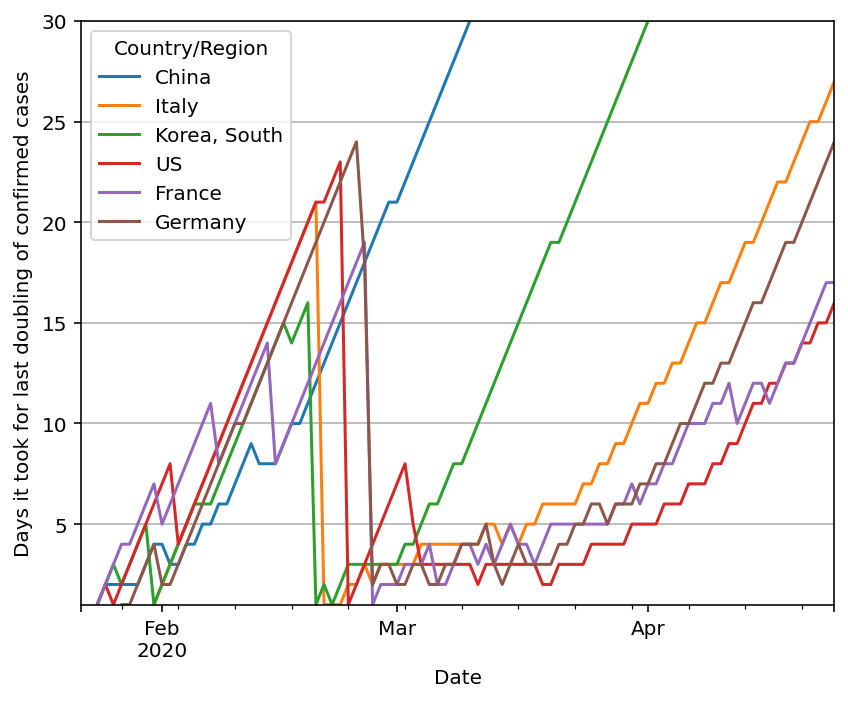

In [10]:
plt.close(2)
fig2, ax2 = plt.subplots(figsize=(6,5), sharex=True, num=2)

days_since_doubling[plot_countries].plot(ax=ax2, logy=False)
ax2.set_ylim([1,30])
ax2.grid(axis='y')
ax2.set_ylabel('Days it took for last doubling of confirmed cases')
fig2.tight_layout()

In [11]:
#fig2.savefig('doubling.png', dpi=300)